## Disasters Risk Assessment in California
Here we have some EDA with visualizations that are aid in risk assment due to wildfires, earthquakes, COVID-19, along with the combined risk in the state of California. All analyses are done at the county level.
1. [Wildfires Risk](#wildfire)
2. [Earthquakes Risk](#earthquake)
3. [COVID-19 Risk](#covid)
4. [Combined Risk](#combo)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
disasters = pd.read_csv('../data/covid_fire_earthquake_summary.csv')

In [3]:
pd.set_option('display.max_columns', 500)
disasters.head()

,fips,county,province_state,covid_last_update,county_latitude,county_longitudue,covid_confirmed,covid_death,covid_recovered,covid_active,covid_indidence_rate,covid_case_fatality_ratio,county_population,covid_death_per_capita,covid_confirmed_per_capita,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score
0,6001.0,Alameda,California,2020-10-17 04:24:12,37.646294,-121.892927,22408,439,0,21969.0,1340.729443,1.959122,1671329,0.000263,0.013407,0.013145,3,0,4,0,0
1,6003.0,Alpine,California,2020-10-17 04:24:12,38.596786,-119.822359,3,0,0,3.0,265.721878,0.000000,1129,0.000000,0.002657,0.002657,0,0,0,0,0
2,6005.0,Amador,California,2020-10-17 04:24:12,38.445831,-120.656960,309,16,0,293.0,777.319380,5.177994,39752,0.000402,0.007773,0.007371,2,0,2,0,0
3,6007.0,Butte,California,2020-10-17 04:24:12,39.667278,-121.600525,3000,50,0,2950.0,1368.700556,1.666667,219186,0.000228,0.013687,0.013459,9,1,10,0,0
4,6009.0,Calaveras,California,2020-10-17 04:24:12,38.205371,-120.552913,331,16,0,315.0,721.054351,4.833837,45905,0.000349,0.007211,0.006862,3,0,3,0,0


#### change all per capita columns to per 10,000

In [4]:
disasters['covid_death_per_capita'] = disasters['covid_death_per_capita'] * 10000

In [5]:
disasters['covid_confirmed_per_capita'] = disasters['covid_confirmed_per_capita'] * 10000

In [6]:
disasters['covid_active_cases_per_capita'] = disasters['covid_active_cases_per_capita'] * 10000

In [7]:
# rename columns to reflect the change
col_names = {'covid_death_per_capita': 'covid_death_per_10000', 'covid_confirmed_per_capita': 'covid_confirmed_per_10000', 'covid_active_cases_per_10000': 'covid_active_cases_per_10000'}
disasters.rename(columns=col_names, inplace=True)

<a id = wildfire> </a> 
### 1. Wildfire Risk

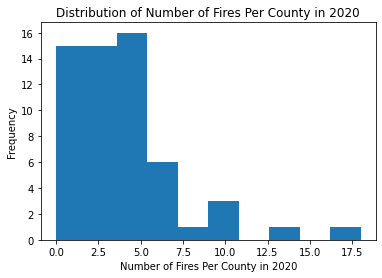

In [8]:
# look at the distribution of number of fires per county
plt.hist(disasters['fires_per_county_in_2020'])
plt.title('Distribution of Number of Fires Per County in 2020')
plt.ylabel('Frequency')
plt.xlabel('Number of Fires Per County in 2020');

Most counties have had 5 or less fires this year (including currently active ones).

In [9]:
# top 10 counties with the most fires in 2020
fire_number = disasters.sort_values('fires_per_county_in_2020', ascending=False)[:10]

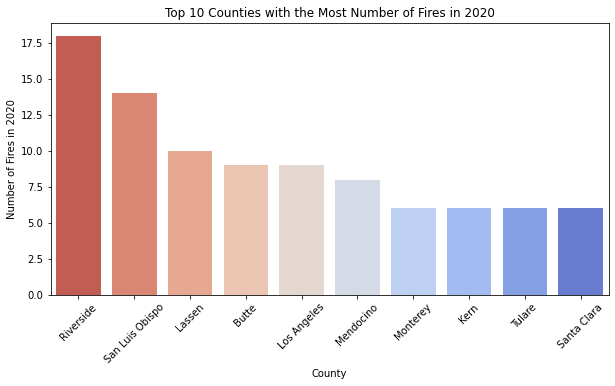

In [10]:
f, ax=plt.subplots(figsize=(10,5))
sns.barplot(y='fires_per_county_in_2020',x='county', data=fire_number, palette='coolwarm_r');
plt.title('Top 10 Counties with the Most Number of Fires in 2020')
plt.xticks(rotation=45)
plt.xlabel('County')
plt.ylabel('Number of Fires in 2020');

In [11]:
fire_risk = disasters.sort_values('fire_score', ascending=False)[:10]

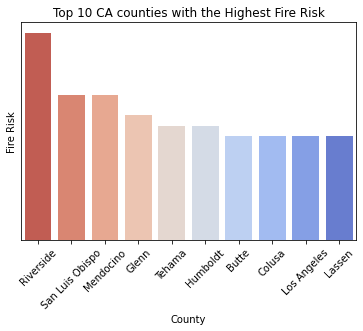

In [22]:
# lets look at the fire score
sns.barplot(y='fire_score',x='county', data=fire_risk, palette='coolwarm_r');
plt.title('Top 10 CA counties with the Highest Fire Risk')
plt.xlabel('County')
plt.ylabel('Fire Risk')
plt.xticks(rotation=45)
plt.yticks([])
plt.savefig('../figures/fire_index_county', bbox_inches='tight');

Riverside county leads in the number of fires and fire risk this year.

<a id = earthquake> </a> 
### Earthquake Risk

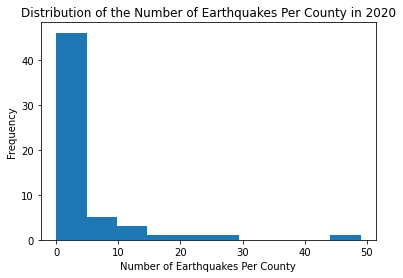

In [13]:
# distribution of number of earthquakes per county in 2020
plt.hist(disasters['earthquakes_per_county_in_2020'])
plt.title('Distribution of the Number of Earthquakes Per County in 2020')
plt.xlabel('Number of Earthquakes Per County')
plt.ylabel('Frequency');

Most counties have had zero earthquakes this year.

In [14]:
#let's look at the 10 counties which had the more earthquakes in 2020
earthquake_number = disasters.sort_values(by='earthquakes_per_county_in_2020', ascending=False)[:10]

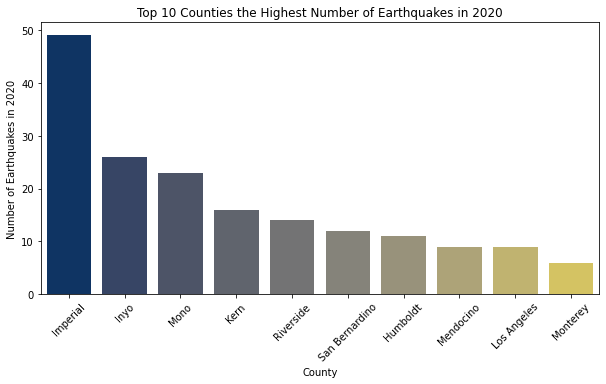

In [15]:
f, ax=plt.subplots(figsize=(10,5))
sns.barplot(y='earthquakes_per_county_in_2020',x='county', data=earthquake_number, palette='cividis');
plt.title('Top 10 Counties the Highest Number of Earthquakes in 2020')
plt.xlabel('County')
plt.ylabel('Number of Earthquakes in 2020')
plt.xticks(rotation=45);

In [16]:
earthquake_risk = disasters.sort_values(by='earthquakes_score', ascending=False)[:10]

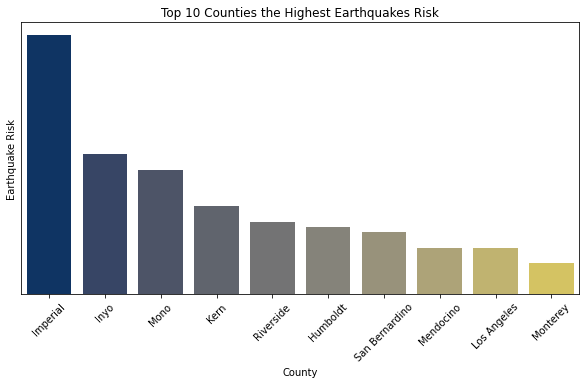

In [23]:
f, ax=plt.subplots(figsize=(10,5))
sns.barplot(y='earthquakes_score',x='county', data=earthquake_risk, palette='cividis');
plt.title('Top 10 Counties the Highest Earthquakes Risk')
plt.xlabel('County')
plt.ylabel('Earthquake Risk')
plt.xticks(rotation=45)
plt.yticks([])
plt.savefig('../figures/earthquake_index_county', bbox_inches='tight');

Imperial county leads in the number of earthquakes and earthquake risk this year

<a id = covid> </a> 
### COVID-19 Risk

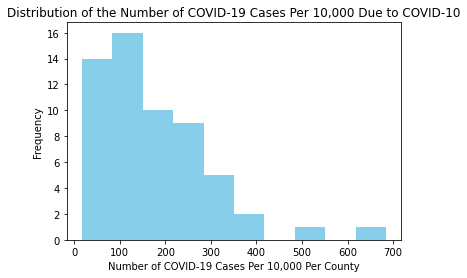

In [18]:
# distribution of number of covid cases per capita per county in 2020
plt.hist(disasters['covid_confirmed_per_10000'], color='skyblue')
plt.title('Distribution of the Number of COVID-19 Cases Per 10,000 Due to COVID-10')
plt.xlabel('Number of COVID-19 Cases Per 10,000 Per County')
plt.ylabel('Frequency')
plt.savefig('../figures/covid_confirmed_capita_dist', bbox_inches='tight');

In [19]:
# total number of confirmed covid cases in california
sum(disasters['covid_confirmed'])/sum(disasters['county_population']) * 10000

220.50214689262106

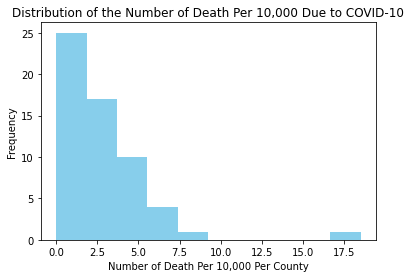

In [20]:
# distribution of number of deaths per capita per county in 2020
plt.hist(disasters['covid_death_per_10000'], color='skyblue')
plt.title('Distribution of the Number of Death Per 10,000 Due to COVID-10')
plt.xlabel('Number of Death Per 10,000 Per County')
plt.ylabel('Frequency')
plt.savefig('../figures/covid_death_capita_dist', bbox_inches='tight');

Most counties have less than % COVID-19 death per 10,000 capita. 

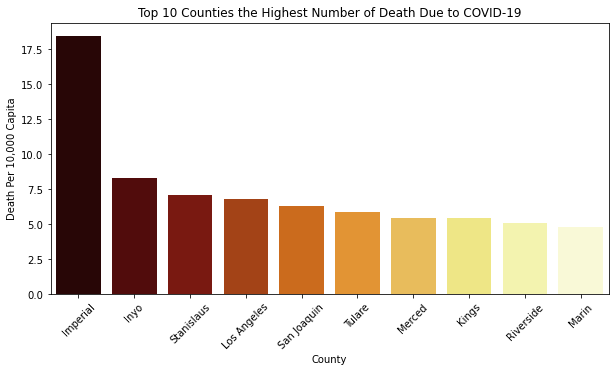

In [21]:
#let's look at the 10 counties which had the most covid deaths per capita
covid_death_capita = disasters.sort_values(by='covid_death_per_10000', ascending=False)[:10]

f, ax=plt.subplots(figsize=(10,5))
sns.barplot(y='covid_death_per_10000',x='county', data=covid_death_capita, palette='afmhot');
plt.title('Top 10 Counties the Highest Number of Death Due to COVID-19')
plt.xlabel('County')
plt.ylabel('Death Per 10,000 Capita')
plt.xticks(rotation=45)
plt.savefig('../figures/covid_death_capita', bbox_inches='tight');

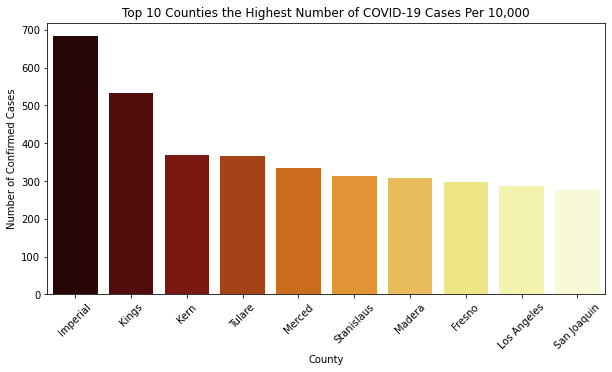

In [56]:
#let's look at the 10 counties which had the most covid confirmed cases per capita
confirmed_capita = disasters.sort_values(by='covid_confirmed_per_10000', ascending=False)[:10]

f, ax=plt.subplots(figsize=(10,5))
sns.barplot(y='covid_confirmed_per_10000',x='county', data=confirmed_capita, palette='afmhot');
plt.title('Top 10 Counties the Highest Number of COVID-19 Cases Per 10,000')
plt.xlabel('County')
plt.ylabel('Number of Confirmed Cases')
plt.xticks(rotation=45)
plt.savefig('../figures/covid_confirmed_capita', bbox_inches='tight');

Imperial county is leading in the number of deaths due to COVID-19

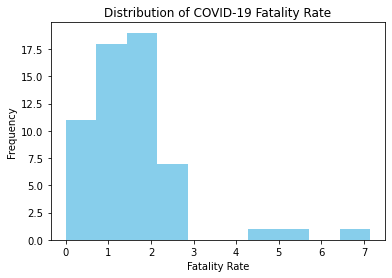

In [39]:
# distribution of fatality rate
plt.hist(disasters['covid_case_fatality_ratio'], color='skyblue')
plt.title('Distribution of COVID-19 Fatality Rate')
plt.xlabel('Fatality Rate')
plt.ylabel('Frequency');

Most counties have relatively low fatality rate

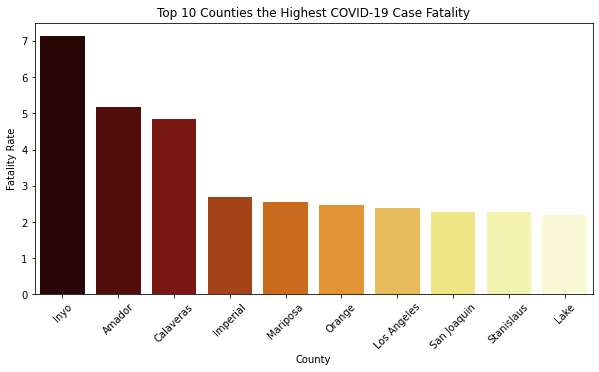

In [22]:
#let's look at the 10 counties which had the highest case fatality rate
fatality_rate = disasters.sort_values(by='covid_case_fatality_ratio', ascending=False)[:10]

f, ax=plt.subplots(figsize=(10,5))
sns.barplot(y='covid_case_fatality_ratio',x='county', data=fatality_rate, palette='afmhot');
plt.title('Top 10 Counties the Highest COVID-19 Case Fatality')
plt.xlabel('County')
plt.ylabel('Fatality Rate')
plt.xticks(rotation=45);

In [23]:
# calculate the per capita fatality rate
disasters['fatality_rate_per_10000'] = disasters['covid_case_fatality_ratio']/disasters['county_population'] *10000

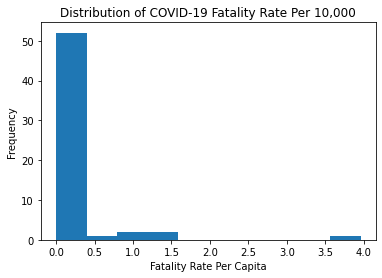

In [24]:
# distribution of fatality rate per capita
plt.hist(disasters['fatality_rate_per_10000'])
plt.title('Distribution of COVID-19 Fatality Rate Per 10,000')
plt.xlabel('Fatality Rate Per Capita')
plt.ylabel('Frequency');

Again, most counties have low fatality rate

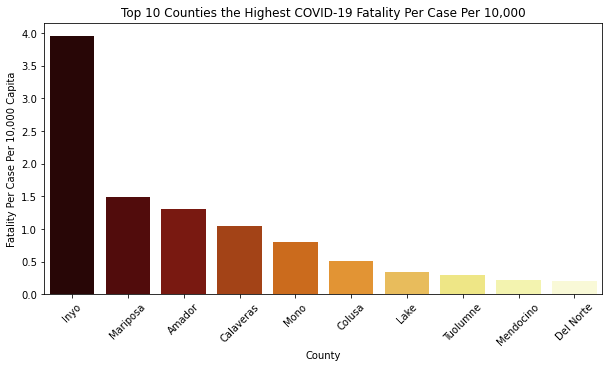

In [57]:
#top 10 counties with the highest case fatality rate per capita
fatality_rate_capita = disasters.sort_values(by='fatality_rate_per_10000', ascending=False)[:10]

f, ax=plt.subplots(figsize=(10,5))
sns.barplot(y='fatality_rate_per_10000',x='county', data=fatality_rate_capita, palette='afmhot');
plt.title('Top 10 Counties the Highest COVID-19 Fatality Per Case Per 10,000')
plt.xlabel('County')
plt.ylabel('Fatality Per Case Per 10,000 Capita')
plt.xticks(rotation=45)
plt.savefig('../figures/covid_case_death_capita', bbox_inches='tight');

In terms of fatality rate, Inyo has the highest fatality rate. Imperial county is no longer in the top 10 suggesting that the interventions are leading to recoveries rather than deaths.

<a id = combo> </a> 
### Combined metric
For a combined risk score, we are simply adding the scaled covid confirmed cases per capita, fire score, and earthquake score. This would allow that all the metrics to contribute equally to the final combined risk index.

In [26]:
# first scaled each metric by standardization
covid_ss = (disasters['covid_confirmed_per_10000'] - np.mean(disasters['covid_confirmed_per_10000'])) / np.std(disasters['covid_confirmed_per_10000'])
fire_ss = (disasters['fire_score'] - np.mean(disasters['fire_score'])) / np.std(disasters['fire_score'])
earthquake_ss = (disasters['earthquakes_score'] - np.mean(disasters['earthquakes_score'])) / np.std(disasters['earthquakes_score'])

In [27]:
# add the scaled metrics together
disasters['combined_risk'] = round((covid_ss + fire_ss + earthquake_ss), 0)

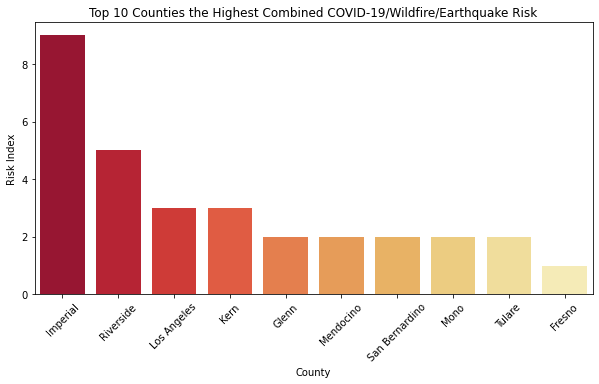

In [28]:
#top 10 counties with the highest combined risk index
fatality_rate_capita = disasters.sort_values(by='combined_risk', ascending=False)[:10]

f, ax=plt.subplots(figsize=(10,5))
sns.barplot(y='combined_risk',x='county', data=fatality_rate_capita, palette='YlOrRd_r');
plt.title('Top 10 Counties the Highest Combined COVID-19/Wildfire/Earthquake Risk')
plt.xlabel('County')
plt.ylabel('Risk Index')
plt.xticks(rotation=45);

In [29]:
# using a different covid metric
covid_ss2 = (disasters['fatality_rate_per_10000'] - np.mean(disasters['fatality_rate_per_10000'])) / np.std(disasters['fatality_rate_per_10000'])
# calculating the combined risk
disasters['combined_risk_2'] = round((covid_ss2 + fire_ss + earthquake_ss), 0)

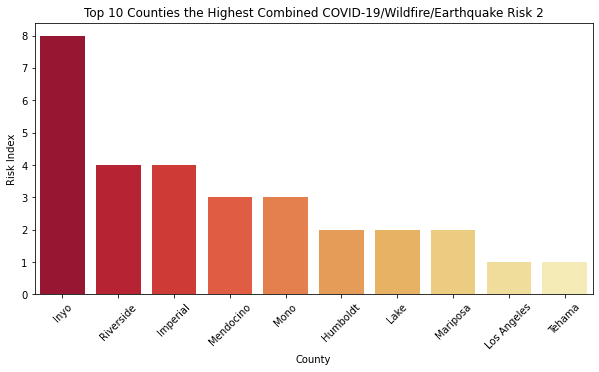

In [30]:
#top 10 counties with the highest combined risk index 2
fatality_rate_capita = disasters.sort_values(by='combined_risk_2', ascending=False)[:10]

f, ax=plt.subplots(figsize=(10,5))
sns.barplot(y='combined_risk_2',x='county', data=fatality_rate_capita, palette='YlOrRd_r');
plt.title('Top 10 Counties the Highest Combined COVID-19/Wildfire/Earthquake Risk 2')
plt.xlabel('County')
plt.ylabel('Risk Index')
plt.xticks(rotation=45);

In [31]:
disasters.to_csv('../data/combined_risk_added.csv')